# Moive dataset analysis and visualization
### Dataset comes from website https://www.kaggle.com/tmdb/tmdb-movie-metadata

## Ask questions before analysis: 
## Question 1: How was the moive style changed over time?
## Question 2: How does the profit vary among different moive styles?
## Question 3: What is the relationship between budget, revenue, vote and popularity?


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
import json
import warnings
warnings.filterwarnings('ignore') #ignore warnings

import seaborn as sns
sns.set(color_codes=True)

In [2]:
# Import the data and view the data
movies = pd.read_csv('tmdb_5000_movies.csv')
creditss = pd.read_csv('tmdb_5000_credits.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# View all column names in movies
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [4]:
# View the data in creditss DataFrame
creditss.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
# The 'Id' in movies DataFrame is the same as the 'movie_id' in the creditss DataFrame, use this to merge two dataframes
merged_df = pd.merge(movies, creditss, left_on='id', right_on='movie_id', how='left')
merged_df.head(n=3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [6]:
# We found there are two 'title' columns, delete the column 'title_y' and rename 'title_x' to 'title'
merged_df.rename(columns={'title_x':'title'},inplace=True)
merged_df.drop('title_y',axis=1,inplace=True)

In [7]:
# Check data information
merged_df.info() # there are a lot of missing data in 'homepage' and 'tagline' which is not a matter (we don't need this part data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

# # Data cleaning

In [8]:
# Overview of the missing value
NAs = pd.DataFrame(merged_df.isnull().sum())
NAs[NAs.sum(axis=1)>0].sort_values(by=[0],ascending=False)

,0
homepage,3091
tagline,844
overview,3
runtime,2
release_date,1


In [9]:
# Find out the missing value in 'release_date'
merged_df.loc[merged_df['release_date'].isnull()==True]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],...,0.0,[],Released,NaN,America Is Still the Place,0.0,0,380097,[],[]


In [10]:
# Search the internet, fill in the release date of 'America is Still the Place' (Date is 2014-06-01)
merged_df['release_date'] = merged_df['release_date'].fillna('2014-06-01')

In [11]:
# Find out the missing value in 'runtime'
merged_df.loc[merged_df['runtime'].isnull()==True]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]",...,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,370980,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]",...,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0,459488,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [12]:
# Search the internet, fill in the runtime
merged_df['runtime'] = merged_df['runtime'].fillna(94, limit=1)# limit=1，fill in one time
merged_df['runtime'] = merged_df['runtime'].fillna(240, limit=1)

In [13]:
# Change 'release_date' to date format and only extract year information
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], format='%Y-%m-%d', errors='coerce').dt.year

In [14]:
# Check the data type of column 'genres'
type(merged_df['genres'][0])

str

In [15]:
# Data in some columns ('genres', 'keywords'....) are JSON format, Convert them to dictionary list first
json_column = ['genres','keywords','production_companies','production_countries','cast','crew']
for column in json_column:
    merged_df[column]=merged_df[column].map(json.loads)

In [16]:
# Extract the value in the key ‘name’ in the dictionary and generate a string separated by '|'
def pickname(x):
    list = []
    for i in x:
        list.append(i['name'])
    return '|'.join(list)

In [17]:
# Execute function in some columns
for column in json_column[0:4]:
    merged_df[column] = merged_df[column].map(pickname)

In [18]:
# Look into the data in the column'crew'
merged_df['crew'][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [19]:
# Extract the value in the key ‘Director’ in the column 'crew'
def pickdirector(x):
    list=[]
    for i in x:
        if i['job']=='Director':
            list.append(i['name'])
    return "|".join(list)

merged_df['crew']=merged_df['crew'].map(pickdirector)

In [20]:
# Look into the data in the column'cast'
merged_df['cast'][0]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [21]:
# Extract the first two values in the key ‘character’ in the column 'cast'
def pickcharacter(x):
    list = []
    for i in x:
        list.append(i['character'])
    return '|'.join(list[0:2])

merged_df['cast']=merged_df['cast'].apply(pickcharacter)


In [22]:
# Rename some columns
rename_column = {'release_date':'year','cast':'actor','crew':'director'}
merged_df.rename(columns=rename_column, inplace=True)

In [23]:
# Look at the first two rows of DataFrame
merged_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,actor,director
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners|Twentieth Century Fox ...,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Jake Sully|Neytiri,James Cameron
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Captain Jack Sparrow|Will Turner,Gore Verbinski


In [24]:
# Backup the clean dataset
clean_df = merged_df.copy()
clean_df.to_csv('clean_moive_dataset.csv',index=False)

# Data visualization

In [25]:
# Find out the unique value in column 'genres'
genres_set = set()   # create an empty set
for x in merged_df['genres']:
    genres_set.update(x.split('|'))  # split data by '|', and put it into set
print(genres_set)

{'', 'Science Fiction', 'Drama', 'Comedy', 'War', 'TV Movie', 'Music', 'Adventure', 'Family', 'Western', 'Animation', 'Horror', 'Action', 'Fantasy', 'Documentary', 'Crime', 'Thriller', 'Mystery', 'History', 'Romance', 'Foreign'}


In [26]:
# Remove the first empty string
genres_set.discard('')
print(genres_set)

{'Science Fiction', 'Drama', 'Comedy', 'War', 'TV Movie', 'Music', 'Adventure', 'Family', 'Western', 'Animation', 'Horror', 'Action', 'Fantasy', 'Documentary', 'Crime', 'Thriller', 'Mystery', 'History', 'Romance', 'Foreign'}


In [27]:
# Sum each type of films in every year, sum each type of films in all the years
genres_df = pd.DataFrame()  # create an empty DataFrame
genres_df['year']=merged_df['year']
for genre in genres_set:
    # If contains genre, assign 1 or assign 0
    genres_df[genre] = merged_df['genres'].str.contains(genre).map(lambda x:1 if x else 0)
    
genres_by_year = genres_df.groupby('year').sum() 
genres_by_type = genres_by_year.sum().sort_values(ascending=False)

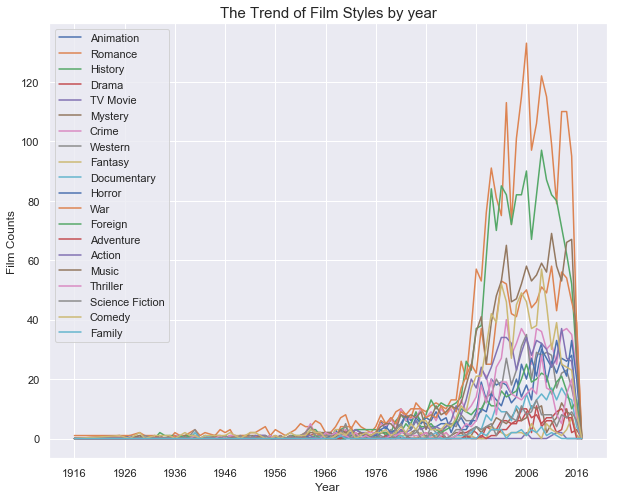

In [28]:
# Plot the figure of genres_by_year in all film styles
fig = plt.figure(figsize=(10,8)) # Design the figure size
plt.plot(genres_by_year)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Film Counts', fontsize=12)
plt.title('The Trend of Film Styles by year', fontsize=15)
plt.xticks(range(1916, 2017, 10))  # give label in x-axis every 10 years
plt.legend(['Animation', 'Romance', 'History', 'Drama', 'TV Movie', 'Mystery', 'Crime', 'Western', 'Fantasy', 
            'Documentary', 'Horror', 'War', 'Foreign', 'Adventure', 'Action', 'Music', 'Thriller', 'Science Fiction', 
            'Comedy', 'Family'])
fig.savefig('film trend by year.png',dpi=200)


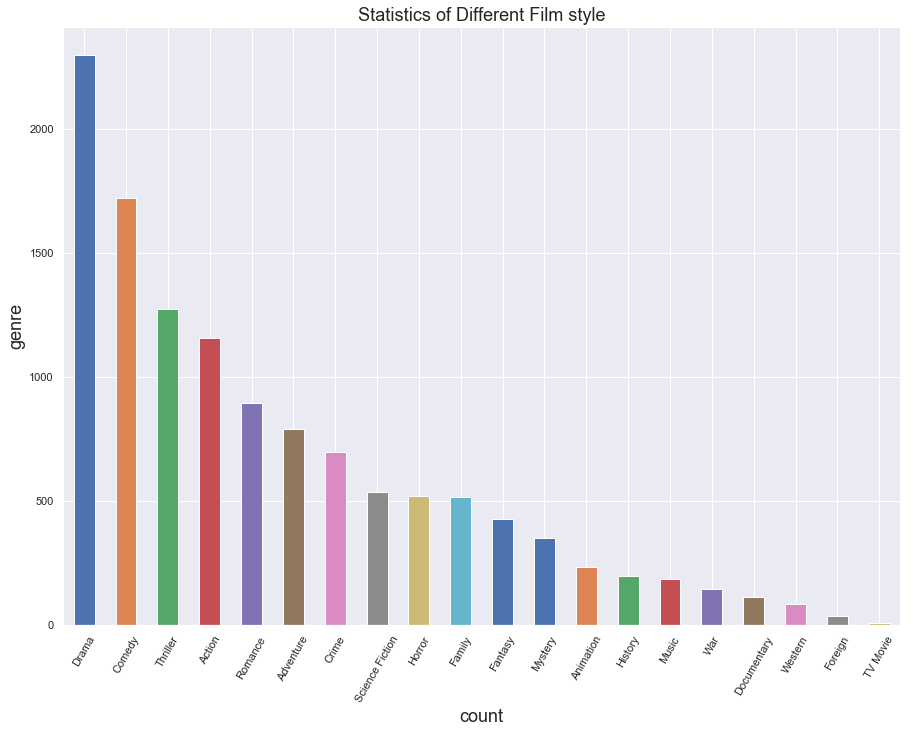

In [29]:
# Plot bar figure of different film styles
fig = plt.figure(figsize=(15,11))
ax = genres_by_type.plot.bar()
plt.xticks(rotation=60)
plt.title('Statistics of Different Film style', fontsize=18)
plt.xlabel('count', fontsize=18)
plt.ylabel('genre', fontsize=18)
plt.show()
fig.savefig('statistics of different film styles.png',dpi=600)

#### According to above two figures , we can see from 1990s, 'Drama', 'Comedy', 'Thriller', 'Action' films has burst growth

In [30]:
# Calculate the profit of films
merged_df['profit'] = merged_df['revenue']-merged_df['budget']
genres_df['profit'] = merged_df['profit']
genres_df['budget'] = merged_df['budget']
genres_df.head()

,year,Science Fiction,Drama,Comedy,War,TV Movie,Music,Adventure,Family,Western,...,Fantasy,Documentary,Crime,Thriller,Mystery,History,Romance,Foreign,profit,budget
0,2009,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,2550965087,237000000
1,2007,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,661000000,300000000
2,2015,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,635674609,245000000
3,2012,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,834939099,250000000
4,2012,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,24139100,260000000


In [31]:
# Calculate mean profit in different film styles
mean_profit_by_genre = pd.Series(index=genres_set)
for genre in genres_set:
    mean_profit_by_genre.loc[genre]=genres_df.loc[:,[genre,'profit']].groupby(genre, as_index=False).mean().loc[1,'profit']
print(mean_profit_by_genre)

Science Fiction    1.005910e+08
Drama              3.143791e+07
Comedy             4.597608e+07
War                4.887342e+07
TV Movie          -1.150000e+06
Music              3.254800e+07
Adventure          1.423333e+08
Family             1.116260e+08
Western            1.916726e+07
Animation          1.592271e+08
Horror             2.897105e+07
Action             8.970235e+07
Fantasy            1.297936e+08
Documentary        7.185600e+06
Crime              3.830085e+07
Thriller           4.907608e+07
Mystery            4.755644e+07
History            2.762010e+07
Romance            3.969103e+07
Foreign           -2.934369e+05
dtype: float64


In [32]:
# Calculate the profit of different films styles
profit_by_genre = pd.Series(index=genres_set)
for genre in genres_set:
    profit_by_genre.loc[genre]=genres_df.loc[:,[genre,'profit']].groupby(genre, as_index=False).sum().loc[1,'profit']
print(profit_by_genre)

Science Fiction    5.381617e+10
Drama              7.221287e+10
Comedy             7.917081e+10
War                7.037772e+09
TV Movie          -9.200000e+06
Music              6.021381e+09
Adventure          1.124433e+11
Family             5.726413e+10
Western            1.571716e+09
Animation          3.725915e+10
Horror             1.503597e+10
Action             1.035165e+11
Fantasy            5.503250e+10
Documentary        7.904160e+08
Crime              2.665739e+10
Thriller           6.252293e+10
Mystery            1.654964e+10
History            5.441159e+09
Romance            3.548378e+10
Foreign           -9.976856e+06
dtype: float64


In [33]:
# Calculate the budget of different films styles
budget_by_genre = pd.Series(index=genres_set)
for genre in genres_set:
    budget_by_genre.loc[genre]=genres_df.loc[:,[genre,'budget']].groupby(genre, as_index=False).sum().loc[1,'budget']
print(budget_by_genre)

Science Fiction    2.774807e+10
Drama              4.749811e+10
Comedy             4.358971e+10
War                5.080674e+09
TV Movie           9.200000e+06
Music              2.942970e+09
Adventure          5.239822e+10
Family             2.601911e+10
Western            2.220454e+09
Animation          1.555302e+10
Horror             7.563922e+09
Action             5.944341e+10
Fantasy            2.694970e+10
Documentary        2.918617e+08
Crime              1.938347e+10
Thriller           4.072750e+10
Mystery            1.069908e+10
History            5.890983e+09
Romance            1.815836e+10
Foreign            2.237501e+07
dtype: float64


In [34]:
# Merge two Series and calculate the profit rate
profit_rate = pd.concat([profit_by_genre, budget_by_genre, mean_profit_by_genre],axis=1)
profit_rate.columns=['profit','budget','mean_profit']   # change columns name
profit_rate['profit_rate'] = (profit_rate['profit']/profit_rate['budget'])*100
profit_rate.sort_values(by=['mean_profit','profit_rate'], ascending=False, inplace=True)
profit_rate.reset_index(inplace=True)
profit_rate

,index,profit,budget,mean_profit,profit_rate
0,Animation,3.725915e+10,1.555302e+10,1.592271e+08,239.562119
1,Adventure,1.124433e+11,5.239822e+10,1.423333e+08,214.593817
2,Fantasy,5.503250e+10,2.694970e+10,1.297936e+08,204.204538
3,Family,5.726413e+10,2.601911e+10,1.116260e+08,220.084891
4,Science Fiction,5.381617e+10,2.774807e+10,1.005910e+08,193.945619
5,Action,1.035165e+11,5.944341e+10,8.970235e+07,174.142960
6,Thriller,6.252293e+10,4.072750e+10,4.907608e+07,153.515285
7,War,7.037772e+09,5.080674e+09,4.887342e+07,138.520444
8,Mystery,1.654964e+10,1.069908e+10,4.755644e+07,154.682824
9,Comedy,7.917081e+10,4.358971e+10,4.597608e+07,181.627275


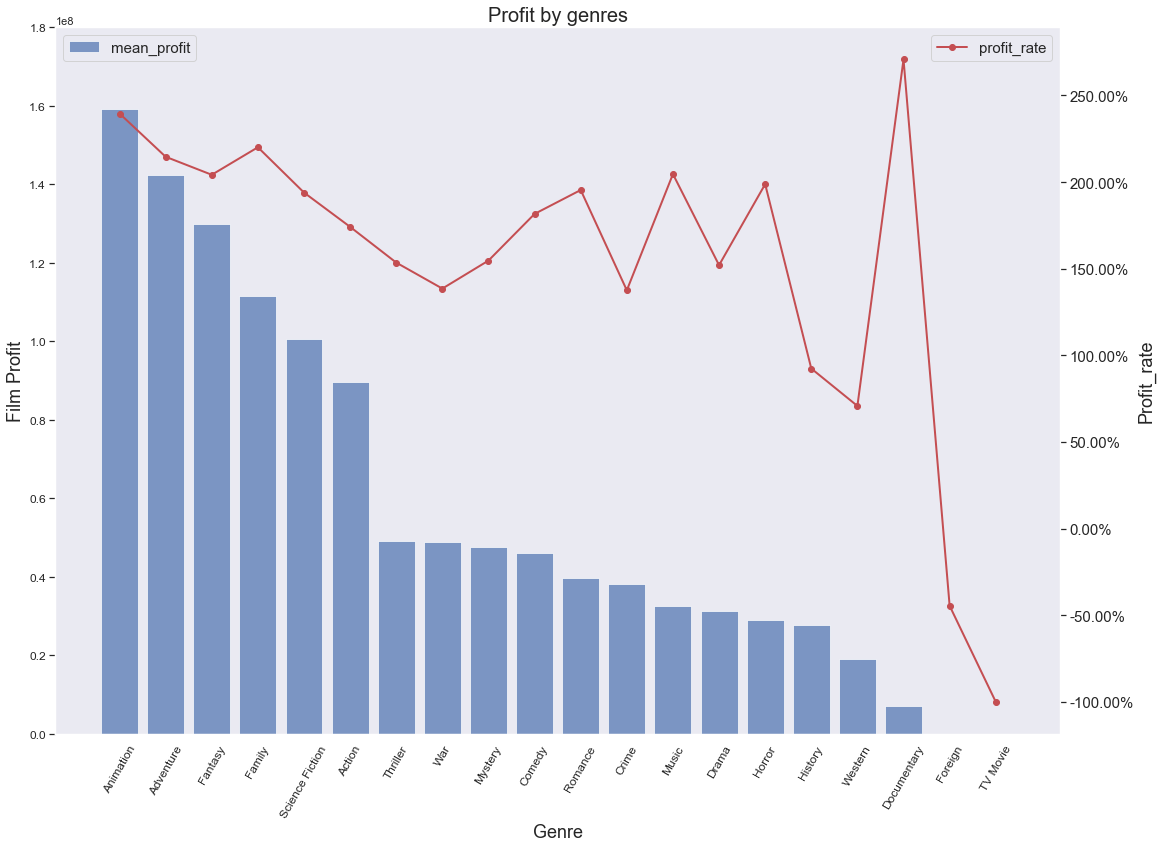

In [35]:
# Plot profit of different film styles
fig = plt.figure(figsize=(18,13)) # set figure size
ax1 = fig.add_subplot(111)
plt.bar(profit_rate['index'],profit_rate['mean_profit'],label='mean_profit',alpha=0.7)
plt.grid(False)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
ax1.set_title('Profit by genres', fontsize=20)
ax1.set_ylabel('Film Profit',fontsize=18)
ax1.set_xlabel('Genre',fontsize=18)
ax1.set_ylim(0,1.8e8)
ax1.legend(loc=2,fontsize=15)

# Plot profit rate of different film styles
import matplotlib.ticker as mtick
ax2 = ax1.twinx()
ax2.plot(profit_rate['index'], profit_rate['profit_rate'],'ro-',lw=2,label='profit_rate')
plt.grid(False)
fmt='%.2f%%'
yticks = mtick.FormatStrFormatter(fmt) # set '%' format in yticks
ax2.yaxis.set_major_formatter(yticks) # set format of yaxis
plt.yticks(fontsize=15)
ax2.set_ylabel('Profit_rate',fontsize=18)
ax2.legend(loc=1,fontsize=15)

# Save the figure
fig.savefig('profit by genres.png')

#### From above figure, we can see 'Animation', 'Adventure', 'Fantasy', 'Science Fiction', 'Action' have the highest profit. 

## Check the correlationship among 'popularity', 'vote_average', 'vote_count', 'budget' and 'revenue'

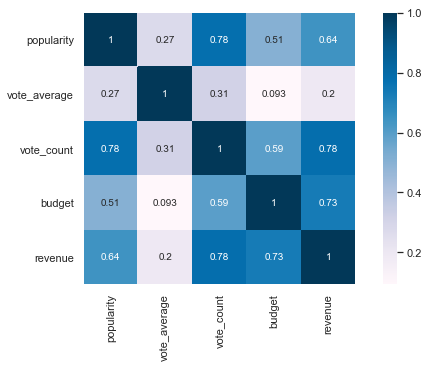

In [36]:
correlation=merged_df[['popularity','vote_average','vote_count','budget','revenue']].corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(correlation,cbar=True, annot=True,vmax=1.0, cmap='PuBu',square=True)

#### we can see that 'popularity' and 'revenue' has strong correlation, 'vote_count' and 'revenue' has strong correlation, 'budget' and 'revenue' also has strong correlation. 

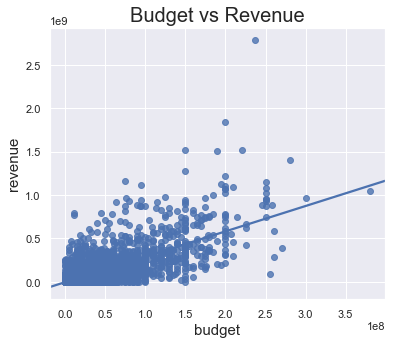

In [37]:
# Look into the correlation between 'budget' and 'revenue'
plt.subplots(figsize=(6,5))
plt.xlabel('Budget',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.title('Budget vs Revenue',fontsize=20)
sns.regplot(x='budget',y='revenue',data=merged_df,ci=None)

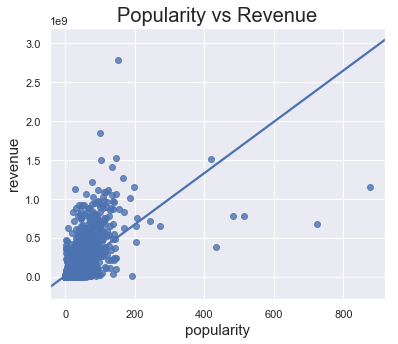

In [38]:
# Look into the correlation between 'popularity' and 'revenue'
plt.subplots(figsize=(6,5))
plt.xlabel('Popularity',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.title('Popularity vs Revenue',fontsize=20)
sns.regplot(x='popularity',y='revenue',data=merged_df,ci=None)

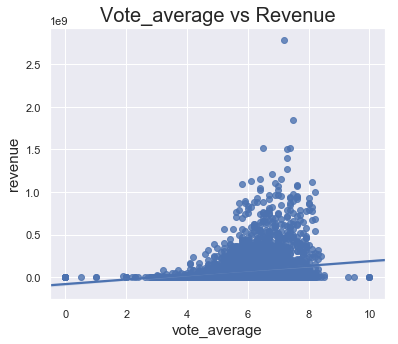

In [39]:
# Look into the correlation between 'vote average' and 'revenue'
plt.subplots(figsize=(6,5))
plt.xlabel('Vote_average',fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.title('Vote_average vs Revenue',fontsize=20)
sns.regplot(x='vote_average',y='revenue',data=merged_df)

## Find out the most popular moive, the highest revenue moive

In [40]:
print("The highest revenue moive is "+merged_df.loc[merged_df['revenue']==merged_df['revenue'].max()]['title'])
print ()
print("The most popular moive is "+merged_df.loc[merged_df['popularity']==merged_df['popularity'].max()]['title'])

0    The highest revenue moive is Avatar
Name: title, dtype: object

546    The most popular moive is Minions
Name: title, dtype: object
